In [1953]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score



In [1954]:
boom_data =pd.read_csv('day.csv')

In [1955]:
boom_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


###  Step 1: Reading and Understanding of data 

In [1956]:
# check shape of data so Here 730 row and 16 columns

boom_data.shape

(730, 16)

In [1957]:
#data type information ,here Nan value is not present

boom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1958]:
#describe the data

boom_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1959]:
# check the columns

boom_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1960]:
boom_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1961]:
# We don't need the Feature 'instant',it is just serial number of the dataset.
# We don't need the Feature 'dtday' because it is already expalained by the other features like: yr, mnth, weekday, workingday and holiday.

boom_data.drop(['instant','dteday'],axis=1,inplace=True)


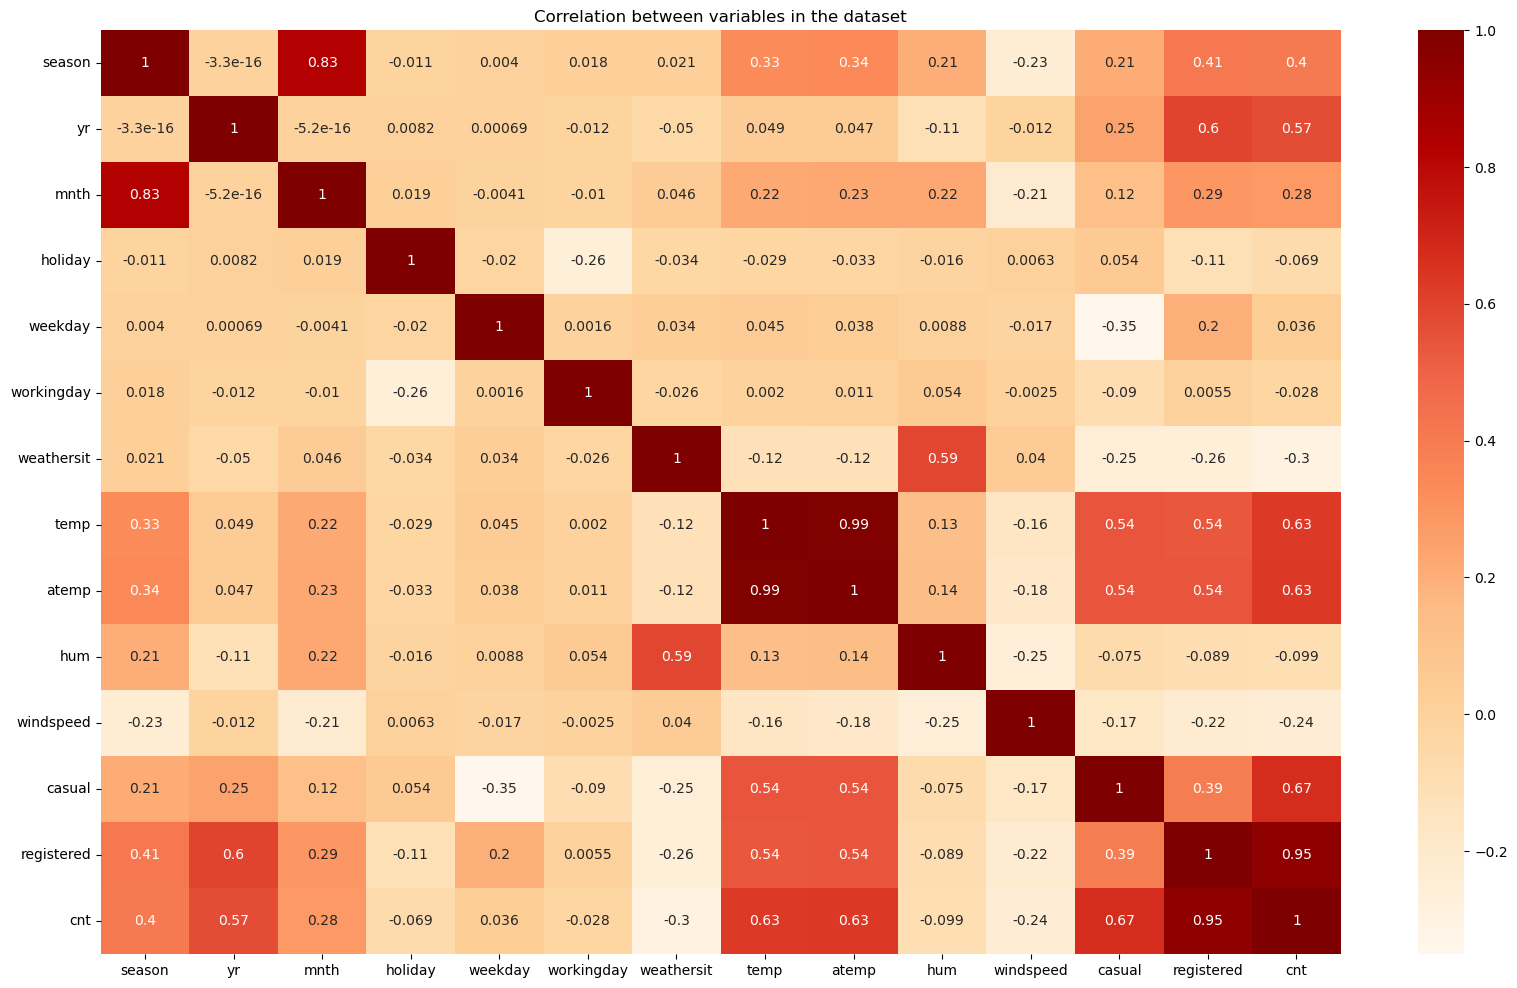

In [1962]:
#making a heatmap to showcase correlation between the variables and decide whether we can perform linear regression on the dataset
plt.figure(figsize=(20, 12))
sns.heatmap(boom_data.corr(), cmap='OrRd', annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()

### As we can see, there are several variables correlated to count variable (cnt) such as registered, casual, temp, atemp, yr, workingday, we can thereby conduct a linear regresssion model

In [1963]:
boom_data[boom_data['season']==4]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
265,4,0,9,0,0,0,2,24.975847,26.10625,97.2500,5.250569,258,2137,2395
266,4,0,9,0,1,1,2,24.873347,28.22060,86.2500,5.251681,1776,3647,5423
267,4,0,9,0,2,1,2,26.000847,28.63185,84.5000,3.375406,1544,3466,5010
268,4,0,9,0,3,1,2,26.615847,29.45210,84.8333,7.416900,684,3946,4630
269,4,0,9,0,4,1,2,26.103347,28.72625,88.5417,7.917457,477,3643,4120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,4,1,12,0,1,1,2,14.862500,18.49690,83.8750,6.749714,538,3248,3786
715,4,1,12,0,2,1,2,16.126653,20.07500,90.7083,6.583306,212,4373,4585
716,4,1,12,0,3,1,1,16.844153,20.48540,66.6250,14.834068,433,5124,5557
717,4,1,12,0,4,1,1,13.632500,17.10810,62.5417,12.334164,333,4934,5267


In [1964]:
# converting yr boolean column to year data

def yr_assing(years):
    if years==0:
        return '2018'
    else:
        return '2019'
    
boom_data['year']=boom_data['yr'].apply(yr_assing)

In [1965]:
boom_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,2019
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,2019
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,2019
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,2019


In [1966]:
 # converting month number column to month name

def month_name(monthNo):
  
    if monthNo == 1:
        return 'Jan'
    elif monthNo == 2:
        return 'Feb' 
    elif monthNo == 3:
        return 'Mar'
    elif monthNo == 4:
        return 'Apr'
    elif monthNo== 5:
        return 'May' 
    elif monthNo ==6:
        return 'Jun'
    elif monthNo == 7:
        return 'Jul' 
    elif monthNo == 8:
        return 'Aug' 
    elif monthNo == 9:
        return 'Sep'
    elif monthNo == 10:
        return 'Oct'
    elif monthNo == 11:
        return 'Nov' 
    elif monthNo == 12:
        return 'Dec'
    
    else:
        return None
boom_data['mnth']=boom_data['mnth'].apply(month_name)

In [1967]:
boom_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,1,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,1,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,1,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,1,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,Dec,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,2019
726,1,1,Dec,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,2019
727,1,1,Dec,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,2019
728,1,1,Dec,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,2019


In [1968]:
# converting weakday number into weakdayname

def weakday_name(weakdayNo):
  
    if weakdayNo == 0:
        return 'Sun'
    elif weakdayNo == 1:
        return 'Mon' 
    elif weakdayNo == 2:
        return 'Tue'
    elif weakdayNo == 3:
        return 'Wed'
    elif weakdayNo== 4:
        return 'Thurs' 
    elif weakdayNo ==5:
        return 'Fri'
    elif weakdayNo == 6:
        return 'Sat' 
    
    else:
        return None
boom_data['weekday']=boom_data['weekday'].apply(weakday_name)

In [1969]:
boom_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,1,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,1,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,1,0,Jan,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,1,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,Dec,0,Fri,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,2019
726,1,1,Dec,0,Sat,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,2019
727,1,1,Dec,0,Sun,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,2019
728,1,1,Dec,0,Mon,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,2019


In [1970]:
#mapping categorical variables with their subcategories to help with visualization analysis 

boom_data['season']=boom_data['season'].map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })


In [1971]:
boom_data['weathersit']=boom_data.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

In [1972]:
boom_data['holiday']=boom_data.holiday.map({0: 'Holiday',1:'Not Holiday'})

In [1973]:
boom_data['workingday']=boom_data.workingday.map({0: 'workingday',1:'Not workingday'})

In [1974]:
boom_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,spring,0,Jan,Holiday,Mon,Not workingday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,spring,0,Jan,Holiday,Tue,Not workingday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,spring,0,Jan,Holiday,Wed,Not workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,spring,0,Jan,Holiday,Thurs,Not workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,spring,0,Jan,Holiday,Fri,Not workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,Holiday,Fri,Not workingday,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114,2019
726,spring,1,Dec,Holiday,Sat,workingday,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095,2019
727,spring,1,Dec,Holiday,Sun,workingday,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341,2019
728,spring,1,Dec,Holiday,Mon,Not workingday,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796,2019


In [1975]:
boom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  year        730 non-null    object 
dtypes: float64(4), int64(4), object(7)
memory usage: 85.7+ KB


In [1976]:
#visualizing the categorical variables of the dataset using boxplot 
data =boom_data.select_dtypes(include = "object").columns.to_list()
catlist=[]
for k in data:
    catlist.append(k)
print(catlist)

def boxplotdata(catcol,count):
    print(count)
    plt.figure(figsize=(20, 12))
    plt.subplot(2, 4, count)
    sns.boxplot(x=catcol, y='cnt', data=boom_data)
    plt.show()
        
        

['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'year']


1


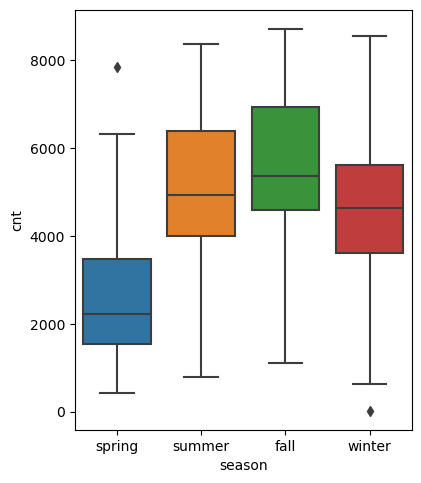

2


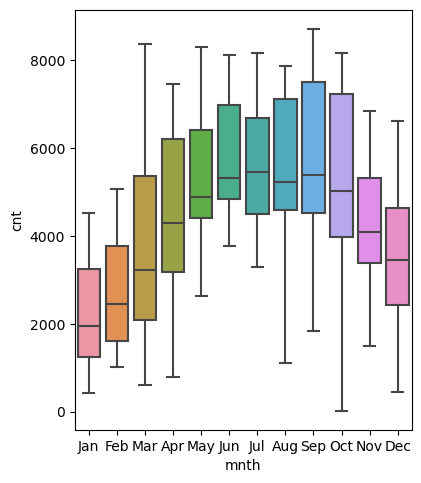

3


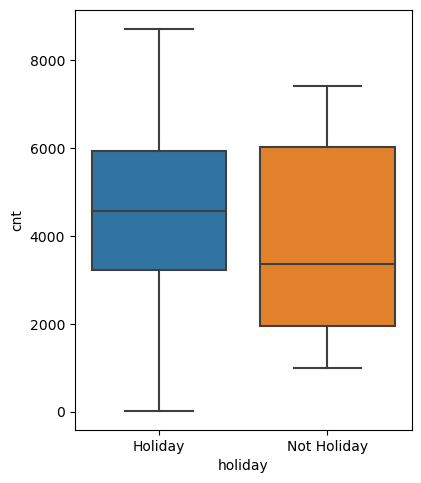

4


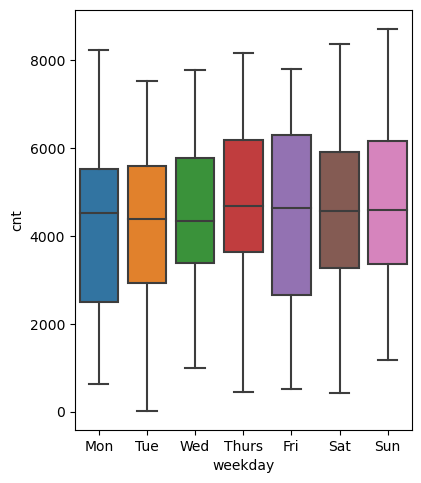

5


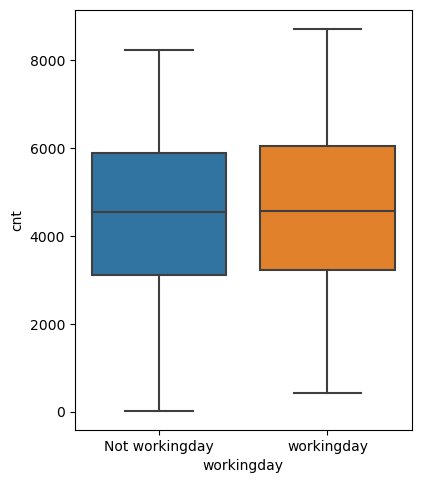

6


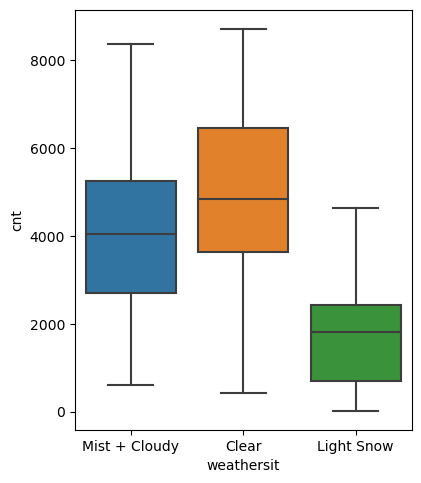

7


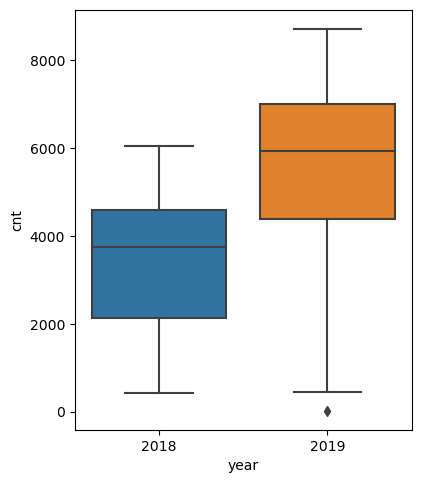

In [1977]:
for index, value in enumerate(catlist, start=1):
    boxplotdata(value,index)

### These are some observation over box plot
### 1. Bike rentals peak during the summer and fall months.
### 2 .September and October see the highest bike rental rates.
### 3 .Bike rentals are most popular during clear weather conditions.
### 4 .Saturdays, Wednesdays, and Thursdays are the busiest days for bike rentals.
### 5 .Bike rental numbers were higher in 2019.
### 6 .Bike rental rates do not significantly vary between weekdays and weekends.
### 7 .Bike rental rates increase on holidays.


In [1978]:
#dropping the un-required variables from the dataset 
#dropping the variables atemp,year casual, registered as they are not needed for the analysis 
#atemp is not needed as temp is already being used, dteday and casual are also not required for regression analysis 

df = boom_data.drop(['atemp','year','casual', 'registered'], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,Holiday,Mon,Not workingday,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,Holiday,Tue,Not workingday,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,Holiday,Wed,Not workingday,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,Holiday,Thurs,Not workingday,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,Holiday,Fri,Not workingday,Clear,9.305237,43.6957,12.522300,1600


In [1979]:
#checking the type, info, description, missing values, shape of the dataset
df.shape

(730, 11)

In [1980]:
df.describe()

,yr,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,20.319259,62.765175,12.763620,4508.006849
std,0.500343,7.506729,14.237589,5.195841,1936.011647
min,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,35.328347,97.250000,34.000021,8714.000000


In [1981]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 62.9+ KB


In [1982]:
#creating dummy variables 
#creating dummy variables for the variables of month, weekday, weathersit, seasons
month = pd.get_dummies(df.mnth, drop_first=True)
weekday = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)
season = pd.get_dummies(df.season, drop_first=True)

In [1983]:

#adding the dummy variables to the original dataframe
df = pd.concat([df,month, weekday, weathersit, season], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thurs,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,Holiday,Mon,Not workingday,Mist + Cloudy,14.110847,80.5833,10.749882,...,False,False,False,False,False,False,True,True,False,False
1,spring,0,Jan,Holiday,Tue,Not workingday,Mist + Cloudy,14.902598,69.6087,16.652113,...,False,False,False,True,False,False,True,True,False,False
2,spring,0,Jan,Holiday,Wed,Not workingday,Clear,8.050924,43.7273,16.636703,...,False,False,False,False,True,False,False,True,False,False
3,spring,0,Jan,Holiday,Thurs,Not workingday,Clear,8.200000,59.0435,10.739832,...,False,False,True,False,False,False,False,True,False,False
4,spring,0,Jan,Holiday,Fri,Not workingday,Clear,9.305237,43.6957,12.522300,...,False,False,False,False,False,False,False,True,False,False


In [1984]:
# map bool into integer value.
bool_cols =df.select_dtypes(include = "bool").columns.to_list()
print(data)
for col in bool_cols:
    df[col] = df[col].map({True: 1,False :0 })

['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'year']


In [1985]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thurs,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,Holiday,Mon,Not workingday,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,Holiday,Tue,Not workingday,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,Jan,Holiday,Wed,Not workingday,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,Jan,Holiday,Thurs,Not workingday,Clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,Jan,Holiday,Fri,Not workingday,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,Holiday,Fri,Not workingday,Mist + Cloudy,10.420847,65.2917,23.458911,...,0,0,0,0,0,0,1,1,0,0
726,spring,1,Dec,Holiday,Sat,workingday,Mist + Cloudy,10.386653,59.0000,10.416557,...,1,0,0,0,0,0,1,1,0,0
727,spring,1,Dec,Holiday,Sun,workingday,Mist + Cloudy,10.386653,75.2917,8.333661,...,0,1,0,0,0,0,1,1,0,0
728,spring,1,Dec,Holiday,Mon,Not workingday,Clear,10.489153,48.3333,23.500518,...,0,0,0,0,0,0,0,1,0,0


In [1986]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head(100)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thurs,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,Holiday,Not workingday,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,Holiday,Not workingday,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,Holiday,Not workingday,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,Holiday,Not workingday,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,Holiday,Not workingday,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,Holiday,Not workingday,16.024153,47.0833,17.625221,2808,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96,0,Holiday,workingday,17.937500,60.2917,10.874904,3141,0,0,0,...,1,0,0,0,0,0,0,0,1,0
97,0,Holiday,workingday,13.769153,83.6250,15.208464,1471,0,0,0,...,0,1,0,0,0,0,1,0,1,0
98,0,Holiday,Not workingday,14.042500,87.7500,8.916561,2455,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [1987]:
df.head(100)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thurs,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,Holiday,Not workingday,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,Holiday,Not workingday,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,Holiday,Not workingday,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,Holiday,Not workingday,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,Holiday,Not workingday,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,Holiday,Not workingday,16.024153,47.0833,17.625221,2808,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96,0,Holiday,workingday,17.937500,60.2917,10.874904,3141,0,0,0,...,1,0,0,0,0,0,0,0,1,0
97,0,Holiday,workingday,13.769153,83.6250,15.208464,1471,0,0,0,...,0,1,0,0,0,0,1,0,1,0
98,0,Holiday,Not workingday,14.042500,87.7500,8.916561,2455,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [1988]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    object 
 2   workingday     730 non-null    object 
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    int64  
 8   Dec            730 non-null    int64  
 9   Feb            730 non-null    int64  
 10  Jan            730 non-null    int64  
 11  Jul            730 non-null    int64  
 12  Jun            730 non-null    int64  
 13  Mar            730 non-null    int64  
 14  May            730 non-null    int64  
 15  Nov            730 non-null    int64  
 16  Oct            730 non-null    int64  
 17  Sep            730 non-null    int64  
 18  Mon       

In [1989]:
# map object into integer value.
bool_cols =df.select_dtypes(include = "object").columns.to_list()
print(data)
for col in bool_cols:
    if col == 'holiday':
        
        df[col] = df[col].map({'Holiday': 0,'Not Holiday':1})
    elif col == 'workingday':
        df[col] = df[col].map({'workingday': 0,'Not workingday':1})

['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'year']


In [1990]:
df

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thurs,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,0,1,0,...,0,0,0,0,0,0,1,1,0,0
726,1,0,0,10.386653,59.0000,10.416557,3095,0,1,0,...,1,0,0,0,0,0,1,1,0,0
727,1,0,0,10.386653,75.2917,8.333661,1341,0,1,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,0,1,0,...,0,0,0,0,0,0,0,1,0,0


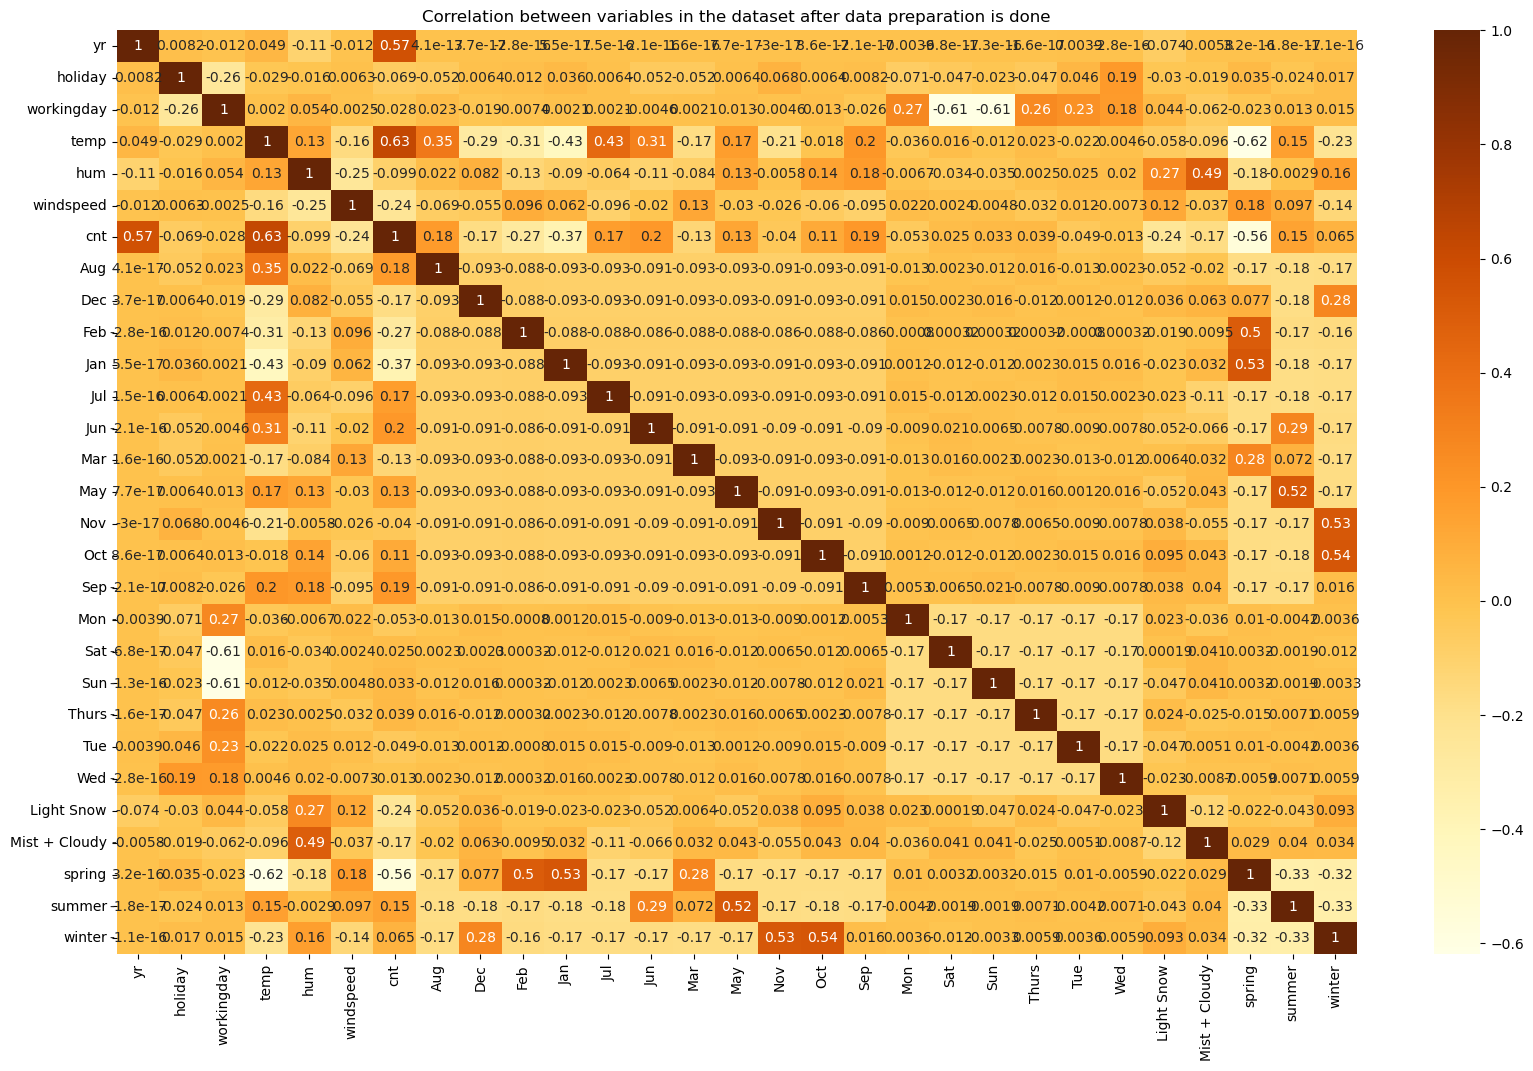

In [1991]:
#making a heatmap to showcase correlation between the new variables 
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='YlOrBr', annot=True)
plt.title('Correlation between variables in the dataset after data preparation is done')
plt.show()

### Step 2: Preparing the data for model training (train-test split, rescaling)

### Feature Scaling continuous variables
### To make all features in same scale to interpret easily

### Following columns are continous to be scaled
### temp,hum,windspeed

In [1992]:
# Splitting the Data into Training and Testing Sets
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [1993]:
#we have to rescale the variables like hum, temp, windspeed, cnt as they have large values as compared to the other variables of the dataset
#we have to normalize these values using the scaler.fit_transform() 
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [1994]:
#checking the normalized values of the train set after performing scaling 
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thurs,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


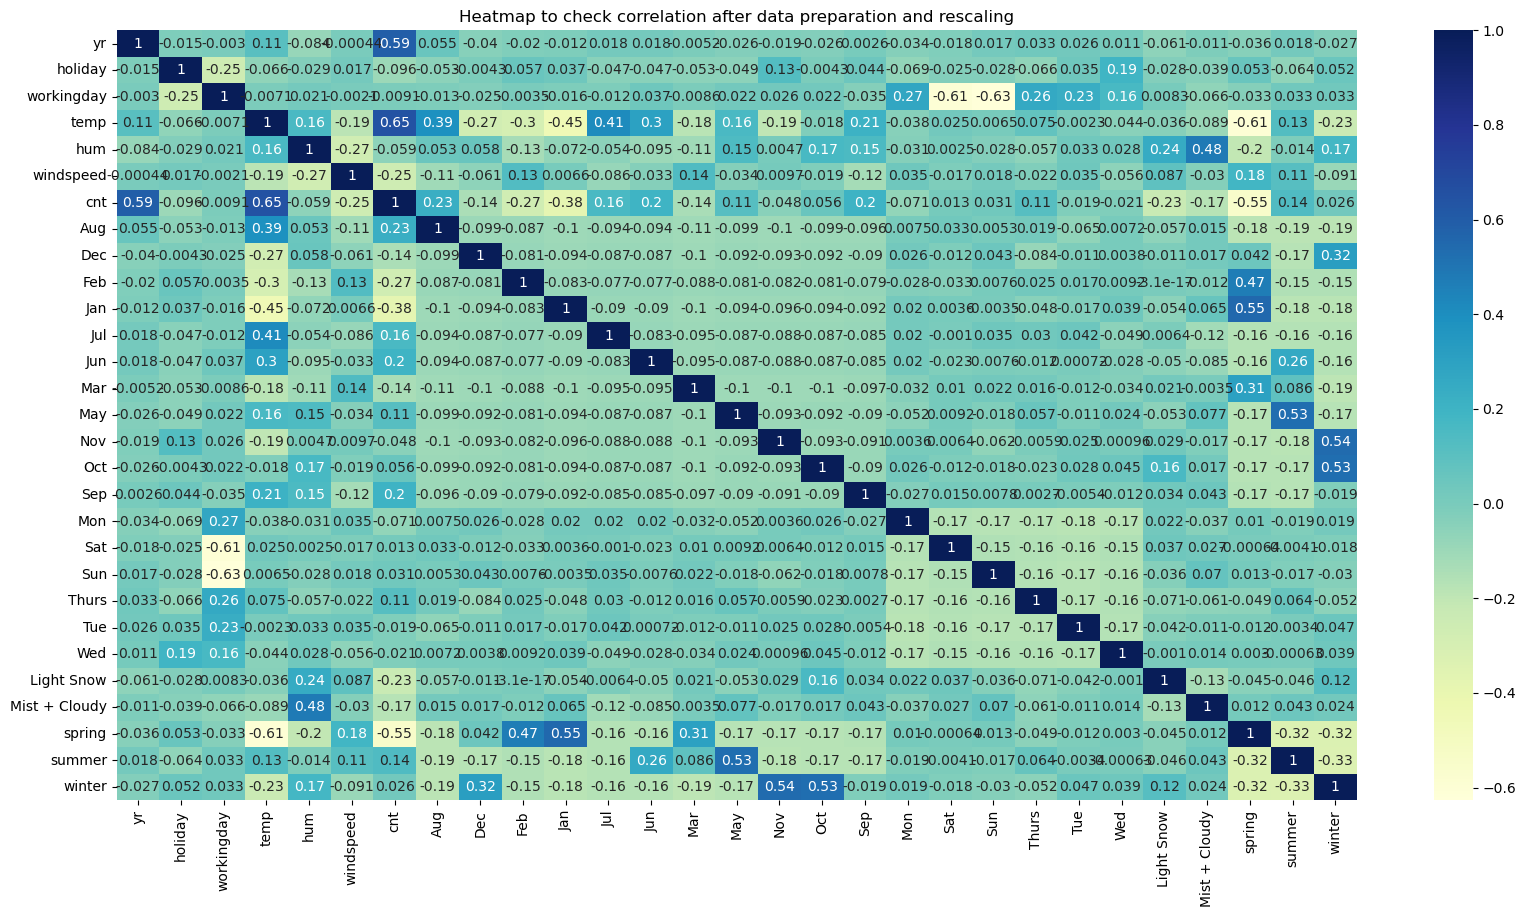

In [1995]:
#checking the correlation coefficients to see which variables are highly correlated post data preparation and rescaling

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
plt.title('Heatmap to check correlation after data preparation and rescaling')
plt.show()

### here we can see over heat map the correlation between cnt and temp is high.

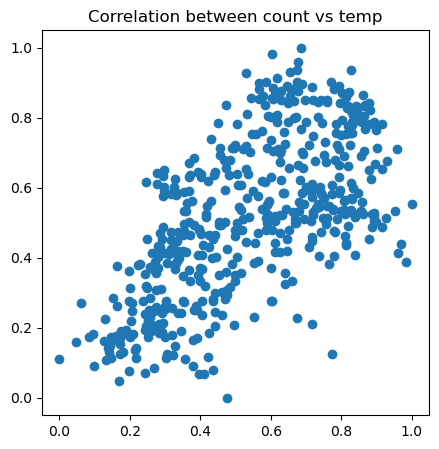

In [1996]:
# here using pairplot we can check the varience between the temp and cnt.

plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

In [1997]:
#building the first model using the variable temp
#preparing the variables for model building 

y_train_set = df_train.pop('cnt')
X_train_set = df_train

In [1998]:
# check the varibale of y_train_set
y_train_set

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [1999]:
# check the varibale of x_train_set
X_train_set

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thurs,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,1,0.248216,0.577930,0.431816,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [2000]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train_set['temp'])
print(X_train_sm)

#create first model
lrm = sm.OLS(y_train_set, X_train_sm)

#fit
lrm_model = lrm.fit()

#params
lrm_model.params

     const      temp
576    1.0  0.815169
426    1.0  0.442393
728    1.0  0.245101
482    1.0  0.395666
111    1.0  0.345824
..     ...       ...
578    1.0  0.863973
53     1.0  0.202618
350    1.0  0.248216
79     1.0  0.462664
520    1.0  0.600225

[510 rows x 2 columns]


const    0.169031
temp     0.640944
dtype: float64

In [2001]:
#checking model summary 
lrm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           2.46e-61
Time:                        15:21:52   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2002]:
#add one more independent variable
X_train_sm = sm.add_constant(X_train_set[['temp','yr']])
print(X_train_sm)

#create model
lr = sm.OLS(y_train_set, X_train_sm)

#fit
lr_model = lrm.fit()

#params
lr_model.params

     const      temp  yr
576    1.0  0.815169   1
426    1.0  0.442393   1
728    1.0  0.245101   1
482    1.0  0.395666   1
111    1.0  0.345824   0
..     ...       ...  ..
578    1.0  0.863973   1
53     1.0  0.202618   0
350    1.0  0.248216   0
79     1.0  0.462664   0
520    1.0  0.600225   1

[510 rows x 3 columns]


const    0.169031
temp     0.640944
dtype: float64

In [2003]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           2.46e-61
Time:                        15:21:53   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### we can see that the r2 value is 41% and p value for tis model is 000.

### Model check for all independent variable.

In [2004]:
X_train_set.columns.to_list()

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'Aug',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep',
 'Mon',
 'Sat',
 'Sun',
 'Thurs',
 'Tue',
 'Wed',
 'Light Snow',
 'Mist + Cloudy',
 'spring',
 'summer',
 'winter']

In [2005]:
#add one more independent variable
X_train_sm = sm.add_constant(X_train_set[X_train_set.columns.to_list()])


#create model
lr = sm.OLS(y_train_set, X_train_sm)

#fit
lr_model = lrm.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [2006]:
#check summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           2.46e-61
Time:                        15:21:58   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


### strong multicollinearity problems or that the design matrix is singular.
### R-squared is now .850 which means 85% of the variance in the count quantity is explained with all the variables

### Using RFE:
### We have found out the R-squared values and the best fit lines using the manual approach for feature selection. We will now using the automated approach for selecting the values required for building the most optimized models and dropping the values which are redundant for our model building approach. We will now use RFE for automated approach, along with VIF to determine the variables to drop.

In [2007]:
#creating the RFE object
lm = LinearRegression()
lm.fit(X_train_set, y_train_set)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train_set, y_train_set)

In [2008]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [2009]:
#Columns selected by RFE and their weights
list(zip(X_train_set.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thurs', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [2010]:
#getting the selected feature variables in one one variable
actual_rfe = X_train_set.columns[rfe.support_]

In [2011]:
actual_rfe

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov',
       'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [2012]:
# Features Rejected by the RFE
rejected_rfe = X_train_set.columns[~(rfe.support_)]
rejected_rfe

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thurs', 'Tue', 'Wed'],
      dtype='object')

In [2013]:
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_set[actual_rfe])

#creating first training model with rfe selected variables
lr = sm.OLS(y_train_set, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.319667
yr               0.230404
holiday         -0.091089
temp             0.481503
hum             -0.162213
windspeed       -0.188726
Dec             -0.035461
Jan             -0.043411
Jul             -0.055250
Nov             -0.038701
Sep              0.075467
Light Snow      -0.246481
Mist + Cloudy   -0.054300
spring          -0.061255
summer           0.042337
winter           0.101921
dtype: float64

In [2014]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          8.15e-189
Time:                        15:22:02   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
yr                0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
hum              -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul              -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer            0.0423      0.015      2.761      0.006       0.012       0.072
winter            0.1019      0.018      5.656      0.000       0.067       0.137
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2015]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
# X_train_ref = X_train_rfe.drop(['const'], axis = 1)

In [2016]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,82.52
13,spring,5.27
3,temp,4.42
15,winter,3.83
14,summer,2.77
4,hum,1.92
9,Nov,1.77
7,Jan,1.68
12,Mist + Cloudy,1.57
6,Dec,1.50


In [2017]:
#checking the VIF of the model 

#dropping the spring variables from the dataset
X_train_ref_sun = X_train_rfe.drop(['spring'], axis = 1)

In [2018]:
#adding constant to training variable
X_train_rfe_sun = sm.add_constant(X_train_ref_sun)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train_set, X_train_rfe_sun)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.256191
yr               0.229013
holiday         -0.094567
temp             0.554985
hum             -0.174153
windspeed       -0.197140
Dec             -0.029482
Jan             -0.047205
Jul             -0.045239
Nov             -0.028848
Sep              0.090318
Light Snow      -0.240216
Mist + Cloudy   -0.051432
summer           0.072936
winter           0.136895
dtype: float64

In [2019]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          3.50e-188
Time:                        15:22:05   Log-Likelihood:                 509.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2562      0.029      8.899      0.000       0.200       0.313
yr                0.2290      0.008     28.159      0.000       0.213       0.245
holiday          -0.0946      0.026     -3.670      0.000      -0.145      -0.044
temp              0.5550      0.027     20.527      0.000       0.502       0.608
hum              -0.1742      0.038     -4.601      0.000      -0.249      -0.100
windspeed        -0.1971      0.026     -7.634      0.000      -0.248      -0.146
Dec              -0.0295      0.018     -1.683      0.093      -0.064       0.005
Jan              -0.0472      0.018     -2.590      0.010      -0.083      -0.011
Jul              -0.0452      0.018     -2.509      0.012      -0.081      -0.010
Nov              -0.0288      0.019     -1.548      0.122      -0.065       0.008
Sep               0.0903      0.016      5.571      0.000       0.058       0.122
Light Snow       -0.2402      0.027     -9.058      0.000      -0.292      -0.188
Mist + Cloudy    -0.0514      0.010     -4.906      0.000      -0.072      -0.031
summer            0.0729      0.011      6.548      0.000       0.051       0.095
winter            0.1369      0.013     10.204      0.000       0.111       0.163
==============================================================================
Omnibus:                       58.341   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.396
Skew:                          -0.649   Prob(JB):                     4.36e-27
Kurtosis:                       5.007   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2020]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe_sun
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,51.76
3,temp,2.32
14,winter,2.09
4,hum,1.90
9,Nov,1.71
7,Jan,1.67
12,Mist + Cloudy,1.55
6,Dec,1.48
13,summer,1.44
8,Jul,1.43


In [2021]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_final = X_train_rfe_sun.drop(['const'], axis = 1)

### Step 3: Residual analysis


In [2022]:
X_train_final = sm.add_constant(X_train_final)

X_train_final

,const,yr,holiday,temp,hum,windspeed,Dec,Jan,Jul,Nov,Sep,Light Snow,Mist + Cloudy,summer,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,1,0,0,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.759870,0.529881,0,0,0,0,0,0,1,1,0


In [2023]:
y_train_pred

576    0.709863
426    0.502162
728    0.383329
482    0.593414
111    0.253651
         ...   
578    0.810002
53     0.245962
350    0.270859
79     0.293796
520    0.659783
Length: 510, dtype: float64

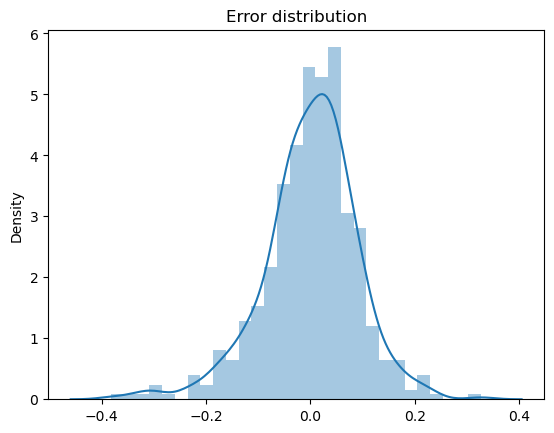

In [2024]:
res = y_train_set - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

 ###  Step 4 Prediction and Evaluation on the test set.

In [2025]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thurs,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,73.3750,11.666643,6606,0,1,0,...,0,0,0,0,1,0,0,0,0,1
127,0,0,1,21.661653,63.1667,5.000712,4333,0,0,0,...,0,0,0,1,0,0,0,0,1,0
640,1,0,1,26.957500,79.3750,4.458569,7572,0,0,0,...,0,0,1,0,0,0,1,0,0,1
72,0,0,1,13.333897,49.6957,9.174042,2046,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [2026]:
#we have to rescale the variables like hum, temp, windspeed, cnt as they have large values as compared to the other variables of the dataset
#we have to normalize these values using the scaler.fit_transform() 

num_vars = ['hum', 'windspeed', 'temp', 'cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thurs,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,0,0,...,0,0,1,0,0,0,0,0,1,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,0,...,1,0,0,0,0,0,1,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [2027]:
X_test_sm.describe()

,const,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thurs,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.0,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.059091,0.086364,0.100000,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.0,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.236333,0.281541,0.300684,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,1.0,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2028]:
 rejected_rfe.to_list()


['workingday',
 'Aug',
 'Feb',
 'Jun',
 'Mar',
 'May',
 'Oct',
 'Mon',
 'Sat',
 'Sun',
 'Thurs',
 'Tue',
 'Wed']

In [2029]:
X_test_sm = X_test_sm.drop(['workingday',
 'Aug',
 'Feb',
 'Jun',
 'Mar',
 'May',
 'Oct',
 'Mon',
 'Sat',
 'Sun',
 'Thurs',
 'Tue',
 'Wed','spring'],axis=1)

# Predict the Price for Test Data using the Trainned Model
y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.sample(5)


193    0.529045
264    0.490440
662    0.731694
54     0.154933
381    0.345102
dtype: float64

In [2030]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8092550928855462


In [2031]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train_set, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8396046699595116


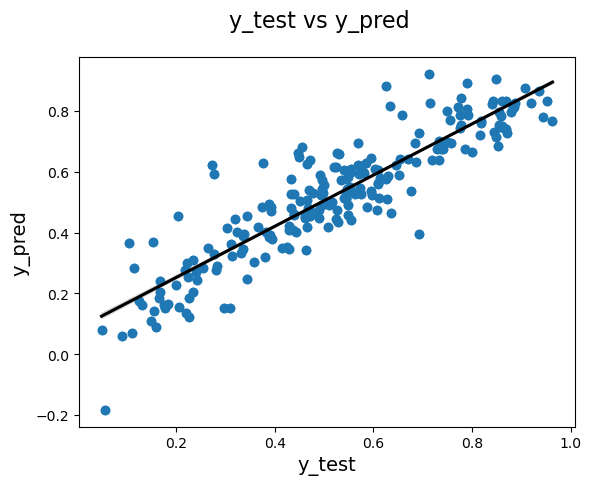

In [2036]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=52, fit_reg=True, line_kws={"color": "black"})
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

### The Final Model accuray is around 80.0%, Which is a Good Score.
### The Model accuracy difference between the Train and Test Data is less than 3% which is acceptable.

In [2038]:
Cofficients_test = round(lr_model.params,2)
data_test = Cofficients.sort_values(ascending = False)
data_test

temp             0.55
const            0.26
yr               0.23
winter           0.14
Sep              0.09
summer           0.07
Dec             -0.03
Nov             -0.03
Jan             -0.05
Jul             -0.05
Mist + Cloudy   -0.05
holiday         -0.09
hum             -0.17
windspeed       -0.20
Light Snow      -0.24
dtype: float64

In [2039]:
for i in range(0, len(data_test)):
    print(data_test[i],'*',data_test.index[i],end ='')
    print(' + ',end ='')

0.55 * temp + 0.26 * const + 0.23 * yr + 0.14 * winter + 0.09 * Sep + 0.07 * summer + -0.03 * Dec + -0.03 * Nov + -0.05 * Jan + -0.05 * Jul + -0.05 * Mist + Cloudy + -0.09 * holiday + -0.17 * hum + -0.2 * windspeed + -0.24 * Light Snow + 

#### Temperature is a key factor positively impacting business, while other environmental conditions like rain, humidity, wind speed, and cloudiness negatively affect it. The company must develop strategies to mitigate the effects of adverse weather, particularly rain, on users. Bike demand peaks in winter and summer, with a noticeable decline during rainy days and seasons.

####  Interestingly, bike rentals see a significant surge on Saturdays compared to other weekdays. Demand for bike rentals grew substantially from 2018 to 2019, indicating Boom Bikes' successful market penetration. The company can anticipate a 19% business growth without additional investment.